In [1]:
import pandas as pd
from sklearn.preprocessing import scale
loandata = pd.read_table('loan_data.txt')
loandata.head()

,nameid,profession,education,house_loan,car_loan,married,child,revenue,approve
0,1,5,1,0,0,1,1,8204,1
1,2,3,1,1,1,0,0,5674,0
2,3,2,3,1,0,1,0,10634,1
3,4,2,2,0,0,0,0,43551,1
4,5,4,2,0,1,0,1,14065,0


In [21]:
X = loandata[["profession",'education','house_loan',"car_loan",'married','child','revenue']];
y = loandata['approve']
X = (X-X.mean())/(X.std())  

In [27]:
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=14 )
predictor = svm.SVC(gamma='scale', C= 1, decision_function_shape='ovr', kernel='rbf')#高斯核函数
# 进行训练
predictor.fit(x_train, y_train)

SVC(C=1)

In [34]:
# 预测结果
result = predictor.predict(x_test)
# 进行评估
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix
print("F-score: {0:.2f}".format(f1_score(result,y_test,average='micro')))
print("roc_auc_score(train) =:%f"%roc_auc_score(result,y_test,average = "micro"))
print("confusion matrix : \n%s" %confusion_matrix(y_test,result))

F-score: 0.82
roc_auc_score(train) =:0.898649
confusion matrix : 
[[ 28  45]
 [  0 177]]


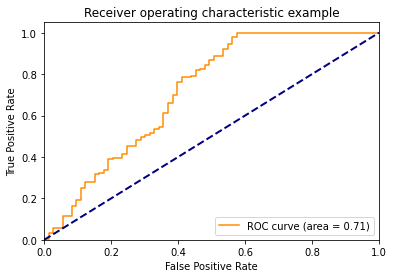

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr,tpr, thresholds = roc_curve(y_test,predictor.decision_function(x_test))
 

auc = roc_auc_score(y_test,predictor.decision_function(x_test))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()